## TEWA tutorial  -  Unsupervised Learning
Dec//2022
@Jozsef Arato


1. multivariate gaussian distribution
2. gaussian mixture model and k-means
3. k-means for image processing
4. PCA for image compression
5. simualting n-dimensional random gaussian data
6. visualize gmm, with probabilties


In [ ]:
import numpy as np

from matplotlib import pyplot as plt

## making 2d gaussian data

the below code generates 2d gaussian data, that is independent

### independent 2d gaussian data, using a covariance matrix



use the np.eye function to make an identity matrix

use such a covariance matrix to make random 2d gaussian data

for making such data, use  np.random.multivariate_normal()

In [ ]:
np.eye(3)  # 3by3 Identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[1., 0.],
       [0., 1.]])

[[1. 0.]
 [0. 1.]]


Text(0.5, 1.0, 'Independent data')

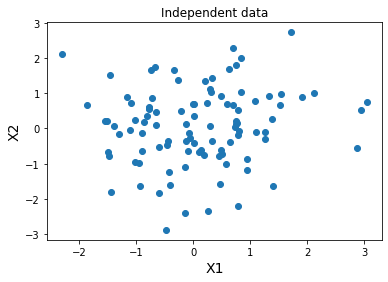

In [ ]:
N=100
Means=[0,0]  # use zero mean for X1 and X2
# YOUR CODE
Covar=np.eye(2)
print(Covar)
XX=np.random.multivariate_normal(# your code)
plt.scatter(XX[:,0],XX[:,1])
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)
plt.title('Independent data')

### dependency with a covariance matrix
change the covariance matrix, such that the data is dependent,
try different values, and make data with positive and negative correlation



[[4.  0.8]
 [0.8 0.3]]


Text(0.5, 1.0, 'Dependent data')

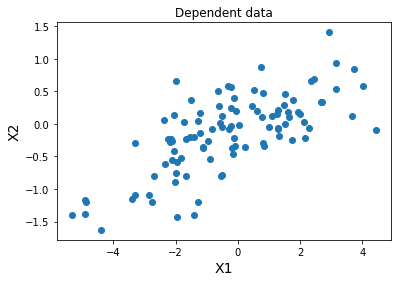

In [ ]:
N=100
Means=[0,0]  # use zero mean for X1 and X2
# YOUR CODE
Covar=np.eye(2)
Covar[0,1]=# your code
Covar[1,0]=# your code
Covar[0,0]=# your code
Covar[1,1]=# your code

print(Covar)
XX=np.random.multivariate_normal(Means,Covar,N)
plt.scatter(XX[:,0],XX[:,1])
plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)
plt.title('Dependent data')

## making multivariate gaussian mixture data
make 3 datasets D1-D3, with different means for X1 and X2,
combine them into a single numpy array, for example using np.vstack()

Text(0, 0.5, 'X2')

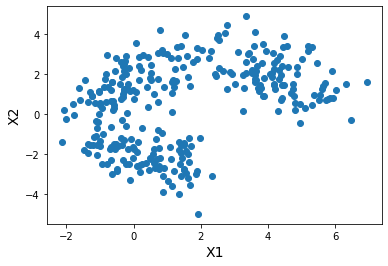

In [ ]:
Covar=np.eye(2)
Covar[0,1]=.5
Covar[1,0]=.5

D1=np.random.multivariate_normal(# your code)

Covar=np.eye(2)
Covar[0,1]=-.5
Covar[1,0]=-.5


D2=np.random.multivariate_normal# your code)
D3=np.random.multivariate_normal(# your code)
XX=np.vstack((D1,D2,D3))
plt.scatter(XX[:,0],XX[:,1])

plt.xlabel('X1',fontsize=14)
plt.ylabel('X2',fontsize=14)

## fitting gaussian mixture model

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

set up model

In [ ]:
gm = GaussianMixture(n_components=3)

fit gaussian mixture  model

> task:  change the number of components, and see how the model fit measures change

observe the fitted score, covariance matrices, and model fit measures (BIC & AIC)


In [ ]:
gm.fit(XX)
print('mean ',# your code)
print('covar ',# your code)
print('score ',# your code)   # average log-likelihood
print('BIC ',gm.bic(XX))   # Bayesian information criterion
print('AIC ',gm.aic(XX))  # Akaike information criterion

mean  [[ 0.30297029 -2.04406441]
 [ 4.14363437  1.972402  ]
 [-0.02567192  1.6170368 ]]
covar  [[[ 1.04605127 -0.39078805]
  [-0.39078805  0.75376872]]

 [[ 1.20838488 -0.53420867]
  [-0.53420867  1.1553788 ]]

 [[ 0.99927484  0.63344479]
  [ 0.63344479  1.1374694 ]]]
score  -3.7474300017204665
BIC  2345.4223031014353
AIC  2282.4580010322798


In [ ]:
gm.covariances_[1]

array([[ 1.20838488, -0.53420867],
       [-0.53420867,  1.1553788 ]])

In [ ]:
gm.covariances_[0]

array([[ 1.04605127, -0.39078805],
       [-0.39078805,  0.75376872]])

In [ ]:
gm.predict(XX)

array([0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### test the predict() method for the original data

visualize prediction

Text(0, 0.5, 'X2')

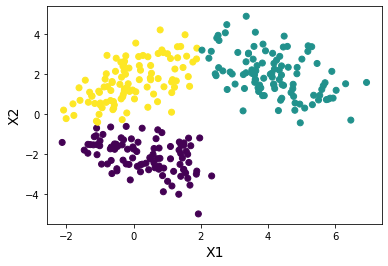

In [ ]:
plt.scatter(XX[:, 0], XX[:, 1], c=gm.predict(XX))
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)

## Homework 1.  (3/5 points)

1. use the above code to fit a gaussian mixture model to the same data with the number of clusters/components changing from 2 to 8. (all values from 2 to 8 with for loop).
2. for each iteration, calculate the model fit measures BIC and AIC
3. graph on a single graph, the number of iterations on the X-axis, and both AIC and BIC on the Y axis (with a line for AIC and another for BIC),
4. remember to add axis labels and legends (to see which one is AIC, which is BIC), try to make it look nice, by chaning fontsize, color, linewidth etc.


remember AIC and BIC are model fit measures, basedon the log-likelihood, and lower values indicate better model fit



## Homework 2. (to get 5/5 points)
implement k-means with numpy only:
requirements:

number of centroids optional
intialize the centroids randomly (within the range of the data)
number of steps optional
keep track of distance (distance to closest centroid should descrease)







## k-means on the same data  (do at the end)

try to repeat the above workflow, but with kmeans, instead of gaussian mixture, and visualize the result

on the same data, do you get the same division with the 2 methods?

In [ ]:
# your code

# upload a photo of your choice

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving bikepic.jpg to bikepic.jpg


due to computational issues, import minibatch kmeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
from PIL import Image
image = np.asarray(Image.open(# your image file))
print('resolution',np.shape(# your code))

resolution (396, 720, 3)


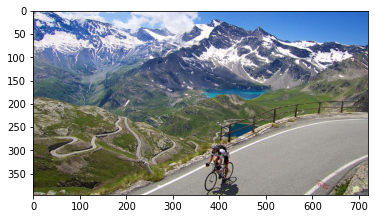

In [ ]:
plt.imshow(image)

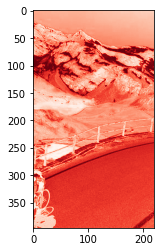

In [ ]:
plt.imshow(image[:, 400:620, 0], cmap="Reds")

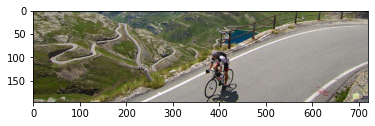

In [ ]:
plt.imshow(image[200:420, :, :])

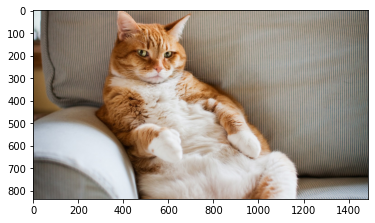

In [ ]:
plt.imshow(image)

transform image into grayscale, using numpy

In [ ]:
gray = np.mean(image, 2)
res = np.shape(gray)

grayArray = gray.reshape(-1, 1)  # 1 dimensional data array for machine learning
print(np.shape(grayArray))

(285120, 1)


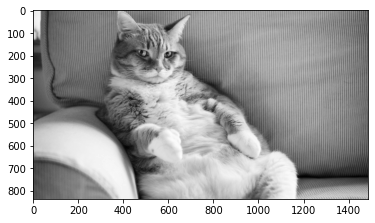

In [ ]:
plt.imshow(gray, cmap=plt.get_cmap("gray"))

(396, 720)


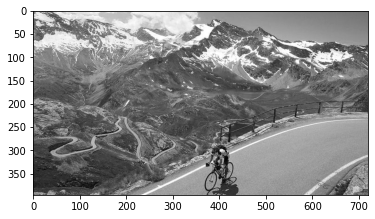

In [ ]:
gray = np.mean(image, 2)
res = np.shape(gray)
print(res)
plt.imshow(gray, cmap=plt.get_cmap("gray"))

## set up k-means algorhitm

if you have a large image, better to use MiniBatchKMeans

In [ ]:
Km = MiniBatchKMeans(n_clusters=6)

use your 1d arrangment of pixel values, to fit the model

In [ ]:
Km.fit(grayArray)

MiniBatchKMeans(n_clusters=6)

(array([ 2276., 10382., 36511., 57388., 42313., 49565., 48550., 10113.,
         9776., 18246.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

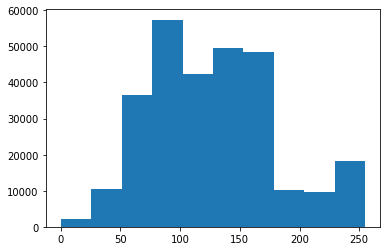

In [ ]:
plt.hist(grayArray)

In [ ]:
Km.cluster_centers_

array([[ 79.55647687],
       [226.97113216],
       [147.56183045]])

In [ ]:
grayArray[0:100].T

array([[220.        , 220.        , 220.        , 220.        ,
        221.        , 222.        , 223.        , 224.        ,
        226.        , 226.        , 226.        , 226.        ,
        226.        , 226.        , 228.        , 229.        ,
        230.        , 230.        , 230.        , 231.        ,
        231.        , 231.        , 232.        , 232.        ,
        232.        , 232.        , 232.        , 233.        ,
        233.        , 233.        , 231.        , 230.        ,
        218.33333333, 205.33333333, 175.66666667, 138.33333333,
        108.33333333,  94.33333333,  91.33333333,  92.66666667,
         91.66666667,  92.33333333,  93.33333333,  94.66666667,
         94.33333333,  92.33333333,  90.33333333,  90.        ,
         91.        ,  96.        , 100.        ,  99.33333333,
         94.33333333,  89.33333333,  83.33333333,  79.33333333,
         75.33333333,  71.33333333,  65.        ,  61.        ,
         60.        ,  59.        ,  56.

In [ ]:
len(grayArray)

1242296

In [ ]:
Km.predict(grayArray)[0:100]  # print prediction for first 100 pixels

array([0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## recover clustered image
The tricky part is recovering the image, based on the model prediction

for this, you will need to combine the predict() and the cluster_centers_

finally you have to reshape from 1d to 2d to get back an image, that you can display




In [ ]:
Preds=Km.predict(# your code)
Km.cluster_centers_


# your code

array([[ 51.98397639],
       [144.02076591],
       [233.22303128],
       [ 85.78147763],
       [169.80340234],
       [114.32532287]])

### vectorized solution

In [ ]:
PrdPix = Km.cluster_centers_[Preds]
Recover = PrdPix.reshape(res)

### iterative solution

In [ ]:
PredPix = np.zeros(len(Preds))
for i in range(len(Preds)):
    PredPix[i] = Km.cluster_centers_[Preds[i]]
Recover = PredPix.reshape(res)

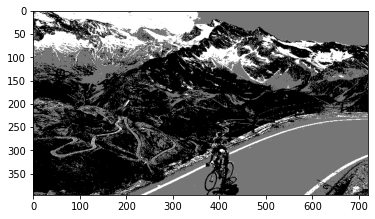

In [ ]:
plt.imshow(Recover, cmap=plt.get_cmap("gray"))

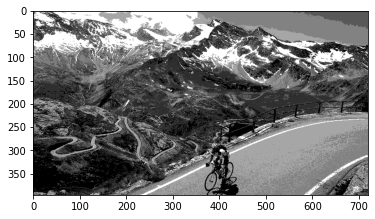

In [ ]:
plt.imshow(Recover, cmap=plt.get_cmap("gray"))

In [ ]:
Km.cluster_centers_

array([[ 79.55647687],
       [226.97113216],
       [147.56183045]])

visualize what you recovered

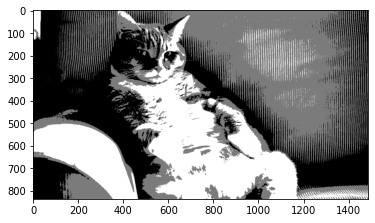

In [ ]:
plt.imshow(Recover, cmap=plt.get_cmap("gray"))

## Principal compnent analysis

lets test it on the same image as above.

remember pca uses correlation (covariance) between columns for that can be used for a compressed represenation..


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pc = PCA(n_components=2)

In [ ]:
pc.fit(gray)

PCA(n_components=2)

 fit_transform is the same as reducing the data, with the components of the fitted PCA:   gray.dot(pc.components_.T)

In [ ]:
reduced = pc.fit_transform(gray)

In [ ]:
print(pc.explained_variance_)
print(pc.explained_variance_ratio_)

[615194.28514479 197463.121314  ]
[0.32233488 0.10346203]


In [ ]:
print("original shape", np.shape(gray))
print(
    "components", np.shape(pc.components_)
)  # components_ contains the "loadings", how much each columns contributes to the PCA-s
print("reduced data", np.shape(reduced))

original shape (396, 720)
components (2, 720)
reduced data (396, 2)


In [ ]:
pc.components_

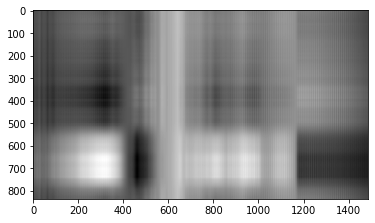

In [ ]:
plt.imshow(pc.inverse_transform(reduced), cmap="gray")

# gray.dot(pc.components_.T

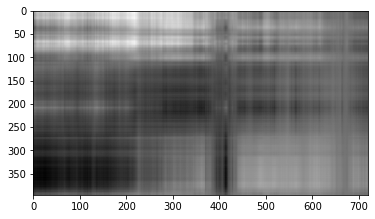

In [ ]:
plt.imshow(pc.inverse_transform(reduced), cmap="gray")

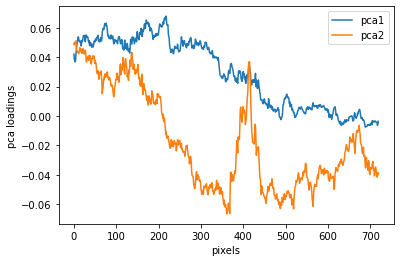

In [ ]:
plt.plot(pc.components_[0, :], label="pca1")
plt.plot(pc.components_[1, :], label="pca2")
plt.xlabel("pixels")
plt.ylabel("pca loadings")
plt.legend()

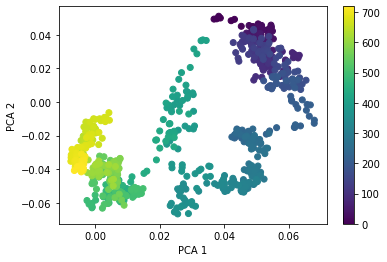

In [ ]:
plt.scatter(
    pc.components_[0, :], pc.components_[1, :], c=np.arange(np.shape(gray)[1])
)  # ,label='pca1')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()

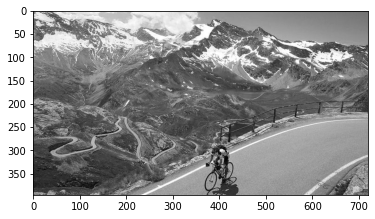

In [ ]:
plt.imshow(gray, cmap="gray")

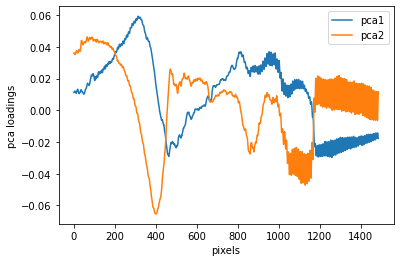

In [ ]:
plt.plot(pc.components_[0, :], label="pca1")
plt.plot(pc.components_[1, :], label="pca2")
plt.xlabel("pixels")
plt.ylabel("pca loadings")
plt.legend()

PCA 1 vs 2, color coded by column number

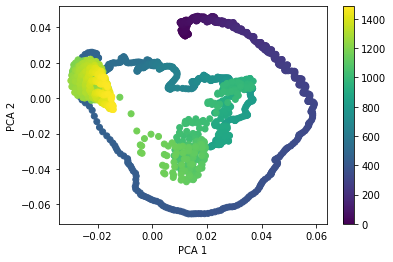

In [ ]:
plt.scatter(
    pc.components_[0, :], pc.components_[1, :], c=np.arange(np.shape(gray)[1])
)  # ,label='pca1')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()

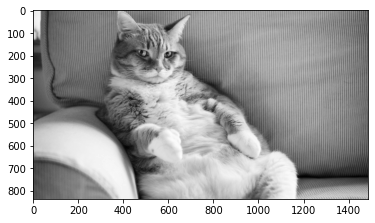

In [ ]:
plt.imshow(gray, cmap="gray")

# testing multiple decompositions

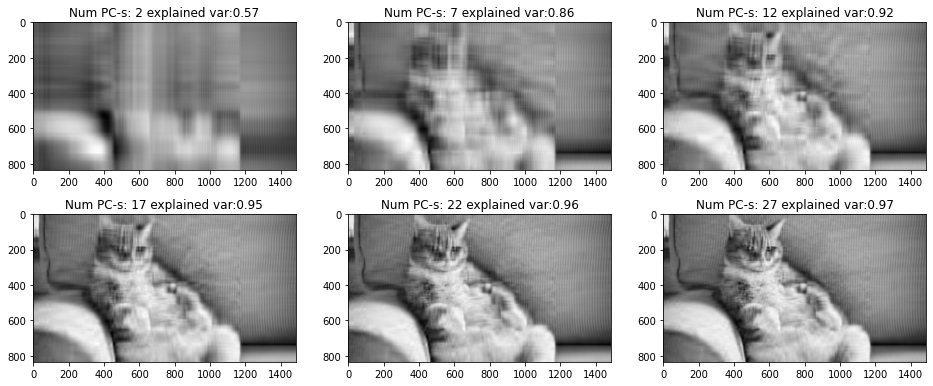

In [ ]:
plt.figure(figsize=(16, 10))
for cc, nc in enumerate(np.arange(2, 30, 5)):
    plt.subplot(3, 3, cc + 1)
    pc = PCA(n_components=nc)
    reduced = pc.fit_transform(gray)
    plt.imshow(pc.inverse_transform(reduced), cmap="gray")
    plt.title(
        "Num PC-s: "
        + str(nc)
        + " explained var:"
        + str(np.round(np.sum(pc.explained_variance_ratio_), 2))
    )

(836, 27)

In [ ]:
np.shape(pc.components_)

(2, 1486)

## Simulating multivariate data with many predictors


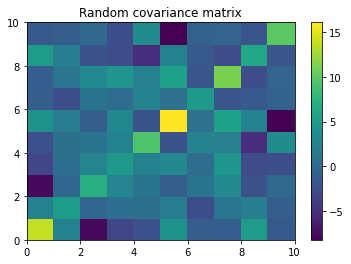

In [ ]:
NVar = 10  # number of variables
Means = np.zeros(NVar)  #  all with zero mean
NDat = 200  # number of data points
A = np.random.normal(0, 1, (NVar, NVar))
Covar = np.dot(A, A.transpose())
plt.pcolor(Covar)
plt.colorbar()
plt.title("Random covariance matrix")
Xtab = np.random.multivariate_normal(Means, Covar, NDat)

with the above covariance matrix, we made a random dataset with 10 predictors

1. calculate the empirical correlation matrix with numpy corrcoef (beware on row and columns defaults)
2. or write your own code, and use scipy.stats.pearsonr
3. visualize the empiricial correlation matrix as above

## print the first 20 rows and all columns of Xtab to "see" the data

In [ ]:
print(Xtab[# your code])

### pca on simualted data
fitting pca and transforming the data into lower dimensions,

In [ ]:
pca = PCA(n_components=2)
DimReduc_data = pca.fit_transform(Xtab)

np.shape(DimReduc_data)

(200, 2)

visualize data, after dimensionality reduction

Text(0, 0.5, 'PC2')

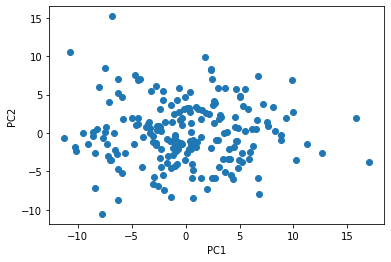

In [ ]:
plt.scatter(DimReduc_data[:, 0], DimReduc_data[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

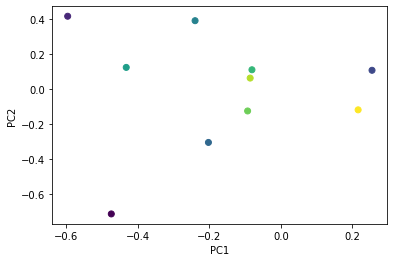

In [ ]:
plt.scatter(pca.components_[0, :], pca.components_[1, :], c=np.arange(NVar))
plt.xlabel("PC1")
plt.ylabel("PC2")

## visualizing gaussian mixture, with predicted probabilities

#### set up params and fit model

In [ ]:
NC = 4
gm = GaussianMixture(n_components=NC)
gm.fit(XX)

GaussianMixture(n_components=4)

make predictions, and visualize

(300, 4)


Text(0.5, 1.0, 'BIC: 2345.0')

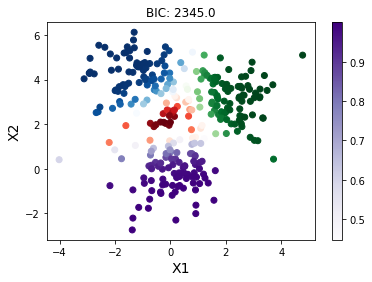

In [ ]:
Cols = [
    "Reds",
    "Blues",
    "Greens",
    "Purples",
    "Greys",
]  # ,'olive','orange','darkred','marine']
Preds = gm.predict(XX)
PredP = gm.predict_proba(XX)
print(np.shape(PredP))
plt.figure()
for c in range(NC):
    plt.scatter(
        XX[Preds == c, 0],
        XX[Preds == c, 1],
        c=np.max(PredP[Preds == c, :], 1),
        cmap=Cols[c],
    )
plt.colorbar()
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.title("BIC: " + str(np.round(gm.bic(XX))))